# Aircraft Recognizer 

Author: Kamil Pikulski

Kodołamacz (Sages) Datascience Bootcamp Final Project

# Problem Description

The aim of the project is to propose an approach of modeling Convolutional Neural Network model to predict aircraft variant basing on photo of an aircraft. There is transfer learning and full model learning approach analysed. Project is divided to three files, since there are three phases of project.

Phases of project and files names:

    1. Transfer Learning phase (Transfer Learning.ipynb) - transfer learning approach is tested for aircraft recognition problem. There are four applications tested: Xception, VGG16, ResNet50 and InceptionV3
    2. Full Model Training phase (Full Model Training.ipynb) - full model training approach basing on InveptionV3 architecture. 
    3. Main File (Main.ipynb) with data preparation and conclusion

Data preparation (the same dataset is used in Transfer Learning Phase and Full Model Training Phase) and conclusions of whole project are included below in this document.

# Dataset

<b>Fine-Grained Visual Classification of Aircraft (FGVC-Aircraft)</b> dataset is used for purpose of this project. The dataset contains 10,000 images of aircraft. The data is split into training, validation and test images. 

FGVC-Aircraft dataset consists of three level categories:
 - Variant, e.g. Boeing 737-700. A variant collapses all the models that are visually indistinguishable into one class. The dataset comprises 100 different variants.
 - Family, e.g. Boeing 737. The dataset comprises 70 different families.
 - Manufacturer, e.g. Boeing. The dataset comprises 41 different manufacturers.
 
Variant of aircraft is the most difficult task from all categories, but it's the most balanced one. Variant classification will only be used in the project.

Source of dataset: https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/

Fine-Grained Visual Classification of Aircraft, S. Maji, J. Kannala, E. Rahtu, M. Blaschko, A. Vedaldi, arXiv.org, 2013

# Images preprocessing

All 10,000 pictures have been manually checked, and some of them have been removed from dataset. Example of removed images are depicted below. Images that were deleted are mainly images of airplane wrecks, images from inside an aircraft (cockpit view, view from the window) and other images that was classified as hard to recognize by author.

In [9]:
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image

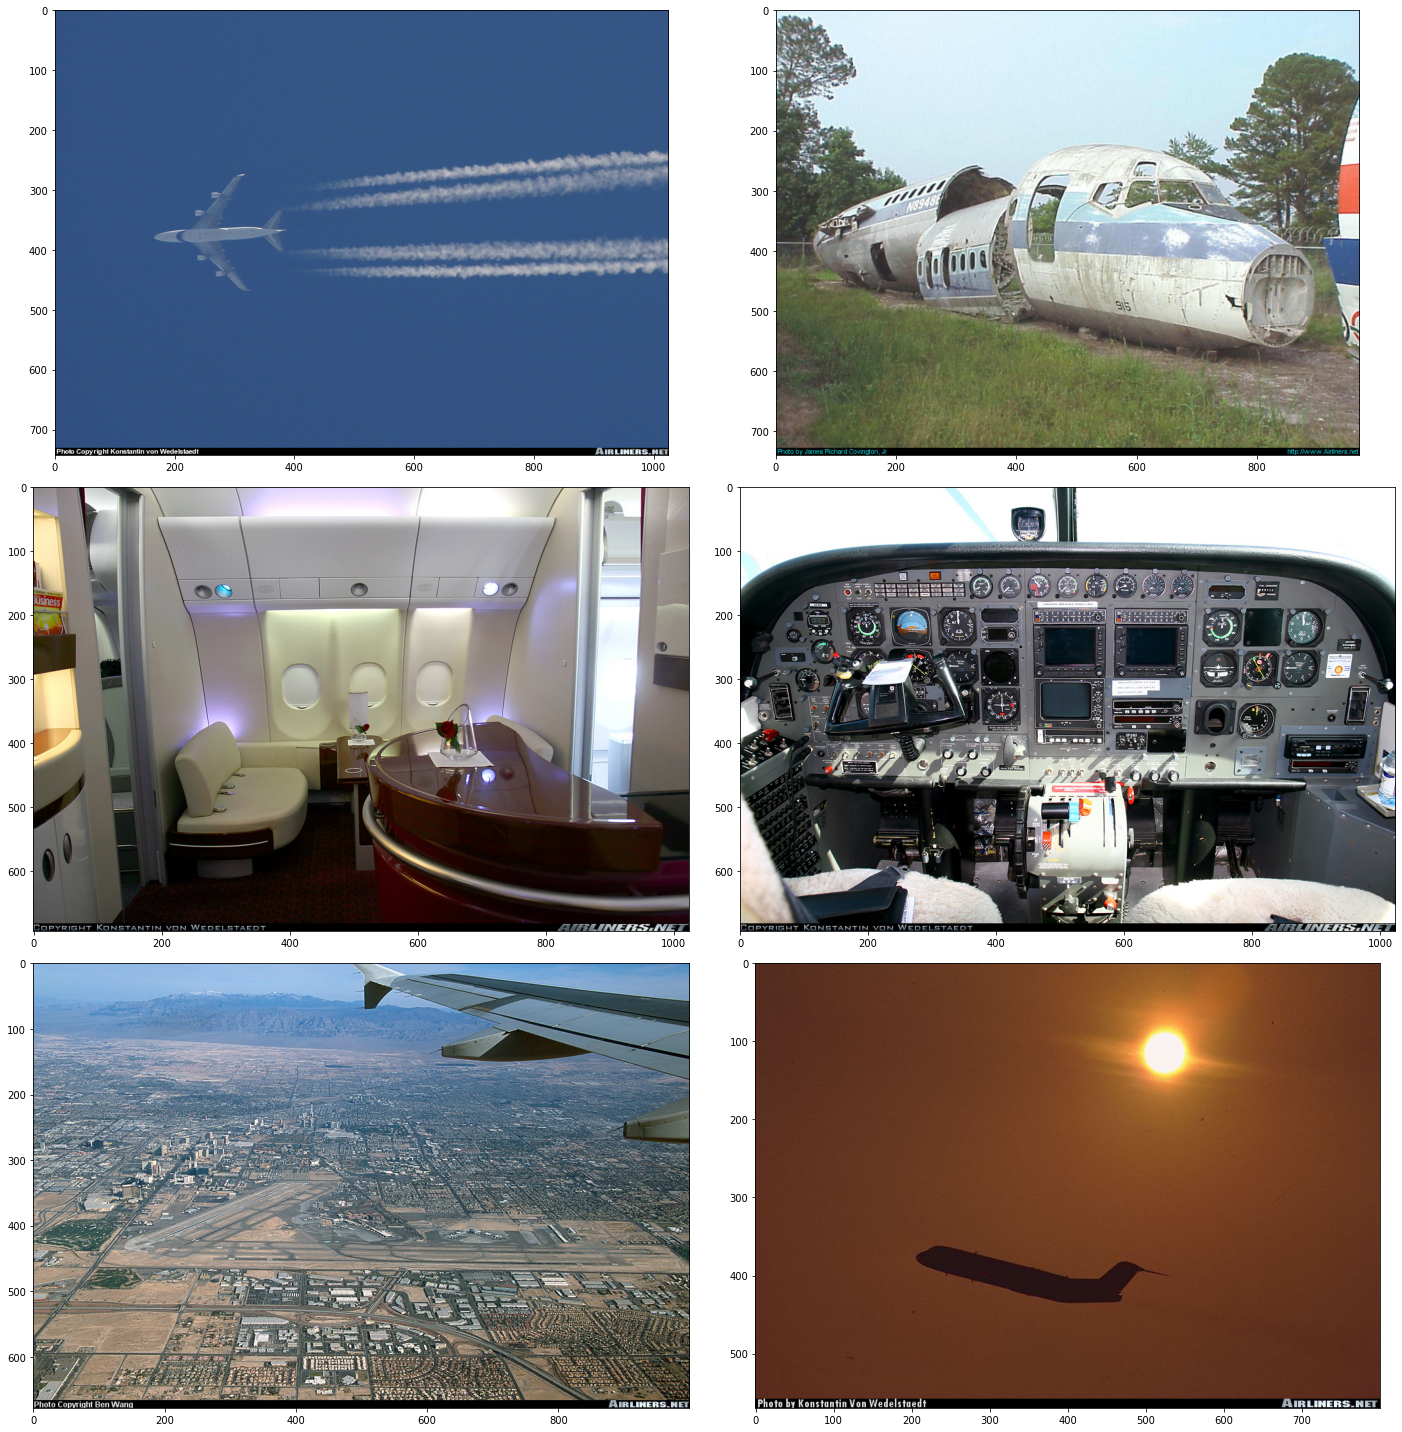

In [23]:
removed_images_path = 'data/removed_example/'
removed_images = [f for f in listdir(removed_images_path)]
removed_images_path = [removed_images_path + f for f in removed_images]

images = [Image.open(x) for x in removed_images_path]

f, axarr = plt.subplots(3,2, figsize=(20,20))
axarr[0,0].imshow(images[0])
axarr[1,0].imshow(images[1])
axarr[2,0].imshow(images[2])
axarr[0,1].imshow(images[3])
axarr[1,1].imshow(images[4])
axarr[2,1].imshow(images[5])

f.tight_layout()
f.show()

After removing images there are :
    
    - 3315 images belonging to train dataset,
    - 3307 images belonging to test dataset,
    - 3306 images belonging to validation dataset.

Image preparation:

    1. Delete black footer from each image,
    2. Cut image to bonding box (data provided with dataset),
    3. Rescale image to (299,299) InceptionV3 size (the biggest size from all applications)
    4. Put image in proper folder (test,train or validation)

In [24]:
from apps.dataset import Dataset

In [25]:
# This code is run only once at the beginning of the project, hashed to not overwrite existing data

# raw_images = 'data/images'
# bonding_box_data = 'data/images_box.txt'
# prepared_images = 'data/images_cropped'

# variant_train = 'data/images_variant_train.txt'
# variant_test = 'data/images_variant_test.txt'
# variant_val = 'data/images_variant_val.txt'

# img_size = (299, 299)
# prep = Dataset()

# prep.categorize(raw_images,img_size,bonding_box_data,variant_train,'variant','train')
# prep.categorize(raw_images,img_size,bonding_box_data,variant_test,'variant','test')
# prep.categorize(raw_images,img_size,bonding_box_data,variant_val,'variant','val')


# Conclusion

####  Transfer Learning 

Transfer Learning approach turned out to be insufficient for airplane recognition problem. Models pretrained on imagenet application doesn't suit the problem. Low validation accuracy is reached. Full Model learning approach is tested then. Summary of transfer learning results is shown in table below (orginal table in <B>Transfer Learning.ipynb</B>).

<img src='images_to_paste/summary_transfer_learning.png'>

#### Full Model Training

Full Model Training, basing on InceptionV3 model architecture gave much better results than in case of Transfer Learning. General accuracy of ~ 77% have been reached. In case of categorical accuracy:

    -Accuracy is higher than 90% for 26.0% of categories
    -Accuracy is higher than 75% for 62.0% of categories
    -Accuracy is higher than 50% for 92.0% of categories
    -Accuracy is higher than 25% for 100.0% of categories
    
There is 8% (8 categories) with accuracy lower than 50%. It's 3 types of aircraft that are confused. It's Boeing 747 - XXX, MD - XX and Airbus A3X0. Difference between these types is hard to be seen even by expierienced planespotter.

For details please see <b> Full Model Training.ipynb </b>

Effect of model prediction is shown below. Mistakenly classified pictures are marked by red frame. Basing on summary below it can be said that model has a problem with:

    - different variants of the same plane like 737-400 vs 737-300, where the only difference is length of airplain,
    - non typical fuselage design - like 767-200 below.

<img src = "images_to_paste/summary.png">